In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data2=pd.read_csv('bank-additional-full.csv',delimiter=';')
df=data2.copy(deep=True)
df1=df.copy(deep=True)
df1

In [ ]:
pd.options.display.max_columns=100

In [ ]:
df

In [ ]:
df.info()

In [ ]:
df.pdays.value_counts()

In [ ]:
df.pdays.value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [317]:
lbe=LabelEncoder()
ohe=OneHotEncoder()

In [318]:
df1_cat=df.select_dtypes(include='object')

In [319]:
df1_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [320]:
df1['job']=lbe.fit_transform(df1['job'])
df1['marital']=lbe.fit_transform(df1['marital'])
df1['education']=lbe.fit_transform(df1['education'])
df1['default']=lbe.fit_transform(df1['default'])
df1['housing']=lbe.fit_transform(df1['housing'])
df1['loan']=lbe.fit_transform(df1['loan'])
df1['contact']=lbe.fit_transform(df1['contact'])
df1['month']=lbe.fit_transform(df1['month'])
df1['day_of_week']=lbe.fit_transform(df1['day_of_week'])
df1['y']=lbe.fit_transform(df1['y'])
df1['poutcome']=lbe.fit_transform(df1['poutcome'])


In [321]:
df1.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [322]:
df1.job.value_counts()

0     10422
1      9254
9      6743
7      3969
4      2924
5      1720
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: job, dtype: int64

In [323]:
df1


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [324]:
df1.pdays=df1.pdays.replace(999,0)

In [325]:
df1.pdays.value_counts()

0     39688
3       439
6       412
4       118
9        64
2        61
7        60
12       58
10       52
5        46
13       36
11       28
1        26
15       24
14       20
8        18
16       11
17        8
18        7
22        3
19        3
21        2
25        1
26        1
27        1
20        1
Name: pdays, dtype: int64

In [326]:
df1.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [327]:
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [328]:
## create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   ])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    
                                    'Precision Score': metrics.precision_score(y_test, test_pred),
                                    'Recall Score': metrics.recall_score(y_test, test_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, test_pred)} 
                                     ,ignore_index = True)
    return(score_card)

In [329]:
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,0,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [330]:
# standardizing the data
from sklearn.preprocessing import MinMaxScaler

msc =MinMaxScaler()
df1_msc=msc.fit_transform(df1)
df1_msc=pd.DataFrame(df1_msc)
df1_msc


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.481481,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.053070,0.000000,0.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.030297,0.000000,0.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.045954,0.000000,0.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,0.000000,0.333333,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,0.030704,0.000000,0.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,0.636364,0.333333,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,0.062424,0.000000,0.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.454545,0.333333,0.714286,0.0,1.0,0.0,0.0,0.777778,0.00,0.067914,0.000000,0.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,1.0
41184,0.358025,0.090909,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.077877,0.000000,0.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,0.0
41185,0.481481,0.454545,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.00,0.038430,0.018182,0.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,0.0
41186,0.333333,0.818182,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.089874,0.000000,0.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,1.0


In [331]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF


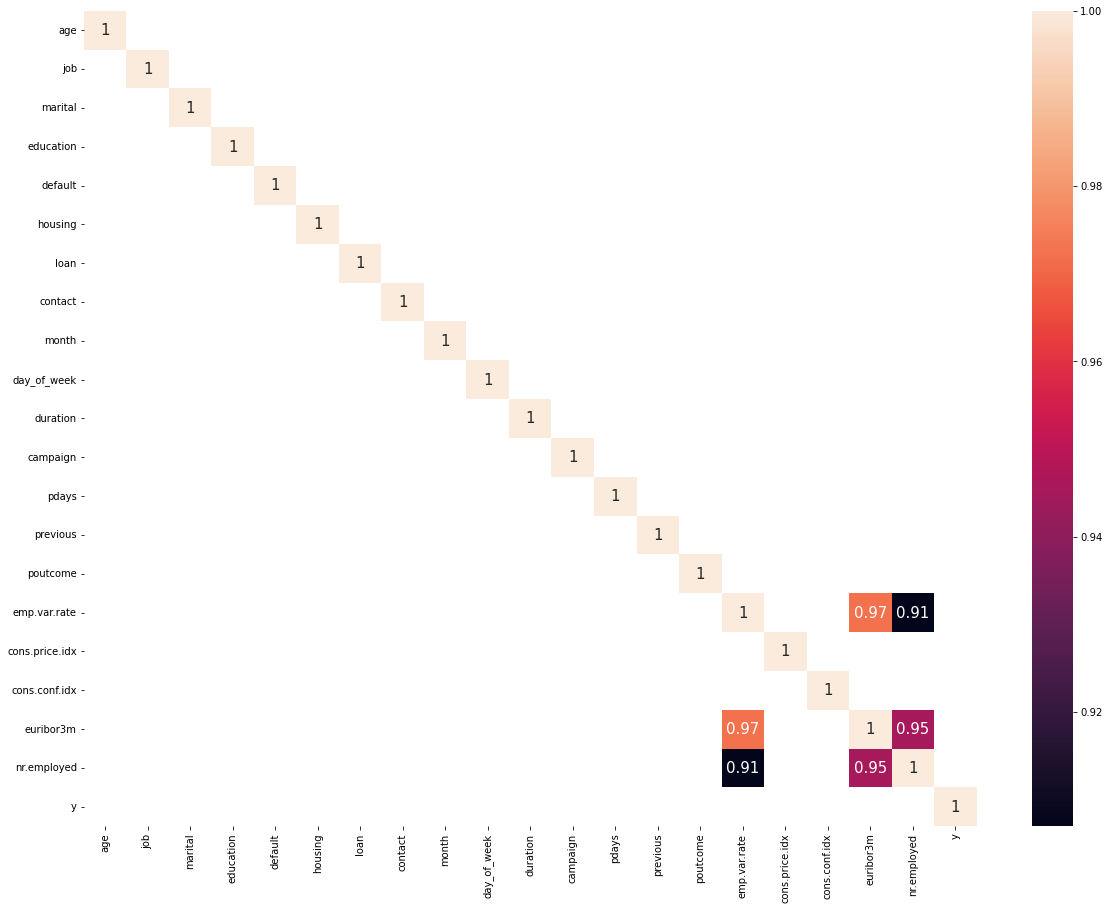

,features,VIF
0,age,6.993240
1,job,2.113290
2,marital,5.465710
3,education,4.373176
4,default,1.403548
5,housing,2.187449
6,loan,1.207155
7,contact,3.362602
8,month,4.797151
9,day_of_week,3.062504


In [332]:
# checking  correlation  and multicollinearity and 
corr =df1.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            annot=True, annot_kws={"size": 15})
plt.show()

# VIF Computing
X1=df1_msc.iloc[:,0:-1]
X=df1.iloc[:,0:-1]
df1_msc_vif=pd.DataFrame({'features':X.columns,'VIF':[VIF(X1.values,i) for i in range(len(X1.columns))]})
df1_msc_vif


In [333]:
df1_msc

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.481481,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.053070,0.000000,0.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
1,0.493827,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.030297,0.000000,0.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
2,0.246914,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.045954,0.000000,0.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
3,0.283951,0.000000,0.333333,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,0.030704,0.000000,0.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
4,0.481481,0.636364,0.333333,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,0.062424,0.000000,0.0,0.000000,0.5,0.937500,0.698753,0.60251,0.957379,0.859735,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.454545,0.333333,0.714286,0.0,1.0,0.0,0.0,0.777778,0.00,0.067914,0.000000,0.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,1.0
41184,0.358025,0.090909,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.077877,0.000000,0.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,0.0
41185,0.481481,0.454545,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.00,0.038430,0.018182,0.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,0.0
41186,0.333333,0.818182,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.089874,0.000000,0.0,0.000000,0.5,0.479167,1.000000,0.00000,0.089322,0.000000,1.0


In [334]:
from sklearn.model_selection import train_test_split as split

In [335]:
# data with scaling 

x=df1_msc.iloc[:,0:-1]
y=df1_msc.iloc[:,-1]

# splitting
x_train,x_test,y_train,y_test=split(x,y,test_size=0.25,random_state=100)


## LOGISTRIC REGRESSION BASE MODEL

In [336]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()

In [337]:
# model fitting
lr.fit(x_train,y_train)

LogisticRegression()

In [338]:
# predicting
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)

In [339]:
#results
update_score_card(lr)

,Model,Precision Score,Recall Score,Accuracy Score
0,LogisticRegression(),0.669725,0.381533,0.910071


## DECISION TREE CLAssifier base Model

In [340]:
from sklearn.tree import DecisionTreeClassifier

In [341]:
# model fitting
DCT=DecisionTreeClassifier()

# model fitting
DCT.fit(x_train,y_train)

# predicting
train_pred=DCT.predict(x_train)
test_pred=DCT.predict(x_test)

In [342]:
#results
update_score_card(DCT)

,Model,Precision Score,Recall Score,Accuracy Score
0,LogisticRegression(),0.669725,0.381533,0.910071
1,DecisionTreeClassifier(),0.505691,0.541812,0.889871


# RandomForest BASE MOdel

In [343]:
from sklearn.ensemble import RandomForestClassifier

In [344]:
# model
rfc=RandomForestClassifier()
rfc=rfc

# model fitting
rfc.fit(x_train,y_train)

# predicting
train_pred=rfc.predict(x_train)
test_pred=rfc.predict(x_test)

In [345]:
#results
update_score_card(rfc)

,Model,Precision Score,Recall Score,Accuracy Score
0,LogisticRegression(),0.669725,0.381533,0.910071
1,DecisionTreeClassifier(),0.505691,0.541812,0.889871
2,"(DecisionTreeClassifier(max_features='auto', r...",0.651366,0.519164,0.915412


# KNeighbor Classifier base MODEL 

In [352]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report as report
from sklearn.metrics import confusion_matrix as matrix


In [315]:
update_score_card(knn)

,Model,Precision Score,Recall Score,Accuracy Score
0,LogisticRegression(),0.669725,0.381533,0.910071
1,DecisionTreeClassifier(),0.507910,0.531359,0.890356
2,"(DecisionTreeClassifier(max_features='auto', r...",0.647059,0.527003,0.915218
3,KNeighborsClassifier(n_neighbors=15),0.634146,0.226481,0.899194


In [353]:
for k in range(1,16,2):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    
    knn.fit(x_train,y_train)
    
    train_pred=knn.predict(x_train)
    test_pred=knn.predict(x_test)
    
    tr_acc=accuracy_score(y_train,train_pred)
    
    ts_acc=accuracy_score(y_test,test_pred)
    
    accuracy=({'k':k,'acc':[tr_acc,ts_acc]})
    print(accuracy)
    
    print('\n tr_report',report(y_train,train_pred))
    print('\n ts_report\n',report(y_test,test_pred))    
    print('\n tr_matrix\n',matrix(y_train,train_pred))
    print('\nts_matrix\n\n ',matrix(y_test,test_pred))
 

{'k': 1, 'acc': [1.0, 0.872390016509663]}

 tr_report               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27399
         1.0       1.00      1.00      1.00      3492

    accuracy                           1.00     30891
   macro avg       1.00      1.00      1.00     30891
weighted avg       1.00      1.00      1.00     30891


 ts_report
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      9149
         1.0       0.42      0.36      0.39      1148

    accuracy                           0.87     10297
   macro avg       0.67      0.65      0.66     10297
weighted avg       0.86      0.87      0.87     10297


 tr_matrix
 [[27399     0]
 [    0  3492]]

ts_matrix

  [[8569  580]
 [ 734  414]]
{'k': 3, 'acc': [0.9288465896215726, 0.8895794891716033]}

 tr_report               precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     27399
         1.0   

In [355]:
for k in range(1,16,2):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    
    knn.fit(x_train,y_train)
    
    train_pred=knn.predict(x_train)
    test_pred=knn.predict(x_test)
    
    tr_acc=accuracy_score(y_train,train_pred)
    
    ts_acc=accuracy_score(y_test,test_pred)
    
    accuracy=({'k':k,'acc':[tr_acc,ts_acc]})
    print(accuracy)
    

{'k': 1, 'acc': [1.0, 0.872390016509663]}
{'k': 3, 'acc': [0.9288465896215726, 0.8895794891716033]}
{'k': 5, 'acc': [0.914829562008352, 0.8917160337962513]}
{'k': 7, 'acc': [0.9099737787705157, 0.8954064290570068]}
{'k': 9, 'acc': [0.9076430028163542, 0.8975429736816548]}
{'k': 11, 'acc': [0.9052474830856884, 0.8980285520054385]}
{'k': 13, 'acc': [0.9040173513321031, 0.8993881713120326]}
{'k': 15, 'acc': [0.9027224758020135, 0.8991939399825192]}


In [357]:
update_score_card(knn)

,Model,Precision Score,Recall Score,Accuracy Score
0,LogisticRegression(),0.669725,0.381533,0.910071
1,DecisionTreeClassifier(),0.505691,0.541812,0.889871
2,"(DecisionTreeClassifier(max_features='auto', r...",0.651366,0.519164,0.915412
3,KNeighborsClassifier(n_neighbors=15),0.634146,0.226481,0.899194


In [356]:
score_card

,Model,Precision Score,Recall Score,Accuracy Score
0,LogisticRegression(),0.669725,0.381533,0.910071
1,DecisionTreeClassifier(),0.505691,0.541812,0.889871
2,"(DecisionTreeClassifier(max_features='auto', r...",0.651366,0.519164,0.915412


## SVM BASE MODEL 

In [359]:


df1.cov()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,108.602451,0.046809,-2.473188,-2.624844,0.699153,-0.016463,-0.055563,0.035230,-0.601471,-0.255920,-2.339147,0.132603,0.254880,0.125661,0.074690,-0.006069,0.005168,6.239801,0.194622,-13.346160,0.100162
job,0.046809,12.920864,0.061060,1.030011,-0.041337,0.024658,-0.026554,-0.043499,-0.276981,-0.004241,-6.048312,-0.068935,0.114323,0.037296,0.015006,-0.046706,-0.033327,0.877736,-0.049130,-5.083673,0.028551
marital,-2.473188,0.061060,0.370762,0.142085,-0.019674,0.006280,0.002550,-0.015979,-0.010777,0.001874,1.624611,-0.012212,0.029712,0.011659,0.000422,-0.080552,-0.020258,-0.095205,-0.097098,-3.792258,0.008895
education,-2.624844,1.030011,0.142085,4.564557,-0.162358,0.035419,0.009869,-0.108763,-0.409837,-0.053705,-8.365727,0.002193,0.106142,0.041058,0.013187,-0.146933,-0.100921,0.779171,-0.134811,-6.404894,0.039043
default,0.699153,-0.041337,-0.019674,-0.162358,0.165394,-0.006337,-0.001113,0.026483,-0.014936,-0.004945,-1.243643,0.036978,-0.037178,-0.020613,0.003456,0.129862,0.039565,0.049920,0.137786,5.578364,-0.012775
housing,-0.016463,0.024658,0.006280,0.035419,-0.006337,0.970844,0.031582,-0.038992,-0.041469,0.004598,-1.956489,-0.030050,0.005693,0.010393,-0.004213,-0.093177,-0.045915,-0.154343,-0.101303,-3.264911,0.003599
loan,-0.055563,-0.026554,0.002550,0.009869,-0.001113,0.031582,0.523620,-0.002981,-0.009578,-0.009450,-0.171915,0.010354,-0.003047,-0.000475,-0.000397,0.002102,-0.001018,-0.040271,0.000157,0.204069,-0.001123
contact,0.035230,-0.043499,-0.015979,-0.108763,0.026483,-0.038992,-0.002981,0.231849,0.308952,-0.006444,-3.327960,0.103191,-0.063762,-0.050721,0.020748,0.297718,0.164853,0.560723,0.333870,9.363808,-0.022040
month,-0.601471,-0.276981,-0.010777,-0.409837,-0.014936,-0.041469,-0.009578,0.308952,5.382516,0.089740,2.219653,-0.398821,0.122085,0.118443,-0.054734,-0.651602,-0.005693,0.103635,-0.471867,-37.116398,-0.004449
day_of_week,-0.255920,-0.004241,0.001874,-0.053705,-0.004945,0.004598,-0.009450,-0.006444,0.089740,1.953216,7.953720,-0.148223,0.008958,-0.002837,0.009500,0.072990,0.004565,0.268203,0.094641,2.865773,0.007056
